# 31회 ADP 복원 

# 기계학습 (60점)

## 데이터 설명
- 데이터 출처 : https://www.kaggle.com/datasets/mandysia/obesity-dataset-cleaned-and-data-sinthetic 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_1_obesity_v2.csv
- 데이터 설명 : 각 환자의 의료정보이다. NObeyesdad를 종속변수로 하는 분류모델을 만드려고 한다.


    id: unique id for each row    
    Gender: sex - male or female    
    Age: age    
    Height: height    
    Weight: weight    
    family_history_with_overweight: Has a family member suffered or suffers f from overweight? - yes or no    
    FAVC: Frequent consumption of high caloric food - yes or no     
    FCVC: Frequency of consumption of vegetables - Never, Sometimes, Always    
    NCP: Number of main meals - 1, 2, 3, 4     
    CAEC: Consumption of food between meals - No, Sometimes, Frequently, Always    
    SMOKE: Do you smoke - yes o no    
    CH2O: Consumption of water daily - Less than a litter, between 1 and 2 l, more than 2 l    
    SCC: Calories consumption monitoring - yes or no   
    FAF: Physical activity frequency - 0, 1 to 2, 2 to 4, 4 to 5     
    TUE: Time using technology devices - 0 to 2, 3 to 5, >5    
    CALC: Consumption of alcohol - no, sometimes, frequently, always    
    MTRANS: Transportation used - automobile, motorbike, bike, public_transportation, walking    
    BMI: Body mass index
    
    (종속변수)     
    NObeyesdad: Type of obesity - overweight-level_i, obesity_type_i, obesity_type_ii, obesity_type_iii

In [25]:
import pandas as pd 
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_1_obesity_v2.csv",index_col=0)
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,4,male,27,1.80,87,no,no,always,3,sometimes,no,between 1 and 2 l,no,2 to 4,0 to 2,frequently,walking,overweight_level_i,26.851852
1,11,male,26,1.85,105,yes,yes,always,3,frequently,no,more than 2 l,no,2 to 4,>5,sometimes,public_transportation,obesity_type_i,30.679328
2,14,male,41,1.80,99,no,yes,sometimes,3,sometimes,no,between 1 and 2 l,no,2 to 4,3 to 5,frequently,automobile,obesity_type_i,30.555556
3,18,female,29,1.53,78,no,yes,sometimes,1,sometimes,no,between 1 and 2 l,no,0,0 to 2,no,automobile,obesity_type_i,33.320518
4,20,female,23,1.65,70,yes,no,sometimes,1,sometimes,no,between 1 and 2 l,no,0,0 to 2,sometimes,public_transportation,overweight_level_i,25.711662


## 1-1  EDA & 결측치 및 이상치를 판단하고 설명하라

,missing,mean,std,min,50%,max,unique,top,freq
id,0,-,-,-,-,-,1262,4,1
TUE,0,-,-,-,-,-,3,0 to 2,615
CAEC,0,-,-,-,-,-,4,sometimes,1190
CALC,0,-,-,-,-,-,3,sometimes,943
CH2O,0,-,-,-,-,-,3,between 1 and 2 l,618
FAF,0,-,-,-,-,-,4,1 to 2,482
FAVC,0,-,-,-,-,-,2,yes,1221
FCVC,0,-,-,-,-,-,3,always,630
Gender,0,-,-,-,-,-,2,male,636
family_history_with_overweight,0,-,-,-,-,-,2,yes,1173


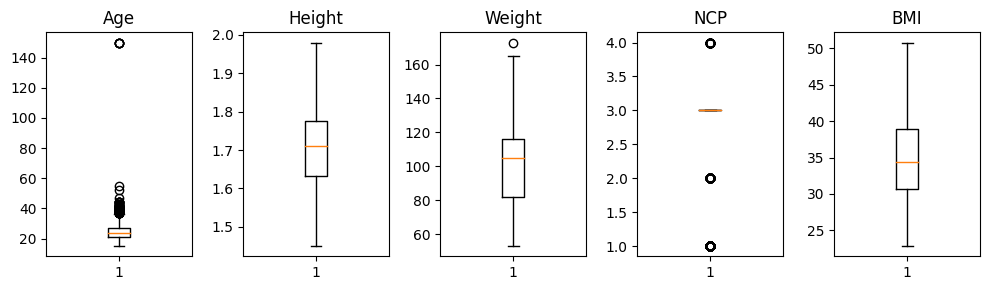

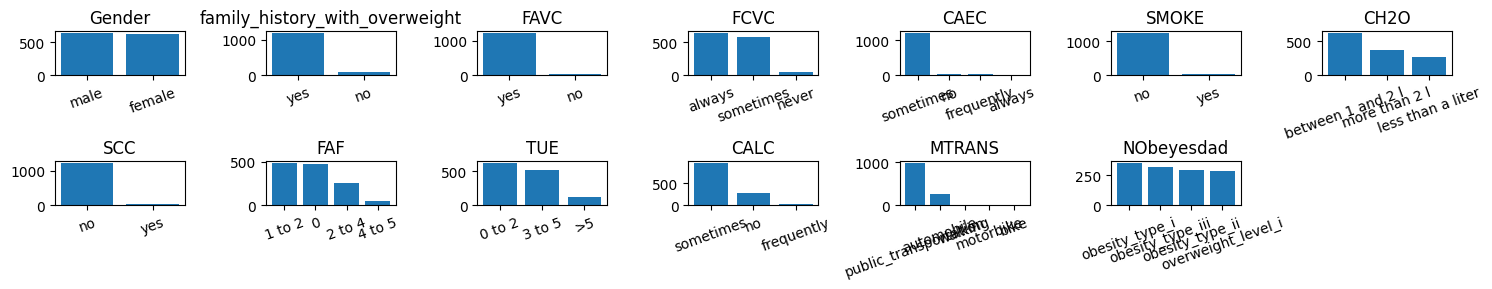


수치형 변수는 5개로 Age에서 이상치가 확인된다. NCP의 경우 데이터는 수치형이지만 범주형 변수로 볼 수 있다.
범주형 변수 중에서는 CAEC와 SMOKE,FAVC,family_history_with_overweight,SCC는 특정 변수에 빈도가 높게 나타난다.



In [2]:
mis = df.isnull().sum().to_frame(name='missing')
merge1 =pd.merge(mis,df.describe().T[['mean','std','min','50%','max']],left_index=True,right_index=True,how='outer').round(1).fillna('-').astype('str')
merge2 = pd.merge(merge1,df.describe(include ='object').T[['unique','top','freq']],left_index=True,right_index=True,how='outer').fillna('-').astype('str')
display(merge2.sort_values('mean'))


import matplotlib.pyplot as plt

fig,axes = plt.subplots(1,5,figsize=(10,3))

for i , col in enumerate(df.select_dtypes(include='number').columns):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)


plt.tight_layout()
plt.show()


fig,axes = plt.subplots(2,7,figsize=(15,3))
for i , col in enumerate(df.select_dtypes(include='object').columns[1:]):
    axes.flat[i].bar(df[col].value_counts().index,df[col].value_counts().values)
    axes.flat[i].set_title(col)
    axes.flat[i].tick_params(axis='x', rotation=20)

fig.delaxes(axes.flat[-1])
plt.tight_layout()
plt.show()

print('''
수치형 변수는 5개로 Age에서 이상치가 확인된다. NCP의 경우 데이터는 수치형이지만 범주형 변수로 볼 수 있다.
범주형 변수 중에서는 CAEC와 SMOKE,FAVC,family_history_with_overweight,SCC는 특정 변수에 빈도가 높게 나타난다.
''')


## 1-2 데이터 전처리 기법 2가지를 설명하고 주어진 데이터에 적용시 어떤 효과가 있는지 설명하라

In [71]:
df.select_dtypes(include ='object')

,id,Gender,family_history_with_overweight,FAVC,FCVC,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,4,male,no,no,always,sometimes,no,between 1 and 2 l,no,2 to 4,0 to 2,frequently,walking,overweight_level_i
1,11,male,yes,yes,always,frequently,no,more than 2 l,no,2 to 4,>5,sometimes,public_transportation,obesity_type_i
2,14,male,no,yes,sometimes,sometimes,no,between 1 and 2 l,no,2 to 4,3 to 5,frequently,automobile,obesity_type_i
3,18,female,no,yes,sometimes,sometimes,no,between 1 and 2 l,no,0,0 to 2,no,automobile,obesity_type_i
4,20,female,yes,no,sometimes,sometimes,no,between 1 and 2 l,no,0,0 to 2,sometimes,public_transportation,overweight_level_i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,"2,107",female,yes,yes,always,sometimes,no,between 1 and 2 l,no,2 to 4,3 to 5,sometimes,public_transportation,obesity_type_iii
1253,"2,108",female,yes,yes,always,sometimes,no,between 1 and 2 l,no,1 to 2,3 to 5,sometimes,public_transportation,obesity_type_iii
1254,"2,109",female,yes,yes,always,sometimes,no,between 1 and 2 l,no,1 to 2,3 to 5,sometimes,public_transportation,obesity_type_iii
1255,"2,110",female,yes,yes,always,sometimes,no,more than 2 l,no,1 to 2,3 to 5,sometimes,public_transportation,obesity_type_iii


In [59]:
## 이상치 제거 및 데이터 변환 관련한 이야기로 풀어나가면 좋을듯합니다.


print('''
범주형 변수 변환방식에는 라벨인코딩과 원핫인코딩 방식이 있다.
라벨 인코딩은 각 범주형 값을 고유한 정수로 변환하는 방식이고 원핫 인코딩은 범주형 데이터를 이진 벡터로 변환하는 방식이다. 
서열관계가 있는 범주형 변수의 경우 라벨인코딩이 유효할 수 있으나 그외의 범주형 변수는 원핫인코딩을 이용해야 숫자의 증감에 따른 영향을 반영하지 않는다.     
TUE,CALC,CAEC,FCVC,CH2O,FAF 컬럼의 경우 라벨인코딩을 활용할 수 있고, 그외 범주형 변수는 원핫인코딩을 진행한다
''')


df = df[df.Age <100].reset_index(drop=True) # 나이 이상치 제거
df_dummies = df.copy()

df_dummies['FCVC'] = df_dummies['FCVC'].map({'never':0,'sometimes':1,'always':2})
df_dummies['CAEC'] = df_dummies['CAEC'].map({'no':0,'sometimes':1,'frequently':2,'always':3})
df_dummies['CH2O'] = df_dummies['CH2O'].map({'less than a liter':0,'between 1 and 2 l':1,'more than 2 l':2})
df_dummies['FAF'] = df_dummies['FAF'].map({'0':0,'1 to 2':1,'2 to 4':2,'4 to 5':3})
df_dummies['TUE'] = df_dummies['TUE'].map({'0 to 2':0,'3 to 5':1,'>5':2})
df_dummies['CALC'] = df_dummies['CALC'].map({'no':0,'sometimes':1,'frequently':2})

df_dum = pd.concat([pd.get_dummies(df_dummies.drop(columns =['NObeyesdad','id'])),df['NObeyesdad']],axis=1)
df_dum.head()


범주형 변수 변환방식에는 라벨인코딩과 원핫인코딩 방식이 있다.
라벨 인코딩은 각 범주형 값을 고유한 정수로 변환하는 방식이고 원핫 인코딩은 범주형 데이터를 이진 벡터로 변환하는 방식이다. 
서열관계가 있는 범주형 변수의 경우 라벨인코딩이 유효할 수 있으나 그외의 범주형 변수는 원핫인코딩을 이용해야 숫자의 증감에 따른 영향을 반영하지 않는다.     
TUE,CALC,CAEC,FCVC,CH2O,FAF 컬럼의 경우 라벨인코딩을 활용할 수 있고, 그외 범주형 변수는 원핫인코딩을 진행한다



,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,...,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,MTRANS_automobile,MTRANS_bike,MTRANS_motorbike,MTRANS_public_transportation,MTRANS_walking,NObeyesdad
0,27,1.80,87,2,3,1,1,2,0,2,...,1,0,1,0,0,0,0,0,1,overweight_level_i
1,26,1.85,105,2,3,2,2,2,2,1,...,1,0,1,0,0,0,0,1,0,obesity_type_i
2,41,1.80,99,1,3,1,1,2,1,2,...,1,0,1,0,1,0,0,0,0,obesity_type_i
3,29,1.53,78,1,1,1,1,0,0,0,...,1,0,1,0,1,0,0,0,0,obesity_type_i
4,23,1.65,70,1,1,1,1,0,0,1,...,1,0,1,0,0,0,0,1,0,overweight_level_i


## 1-3 피쳐 엔지니어링을 통해 파생변수 1개를 생성하고 그 이유를 말하라

In [228]:
from sklearn.decomposition import PCA

sc =df_dum.iloc[:,3:10]
pca =PCA()
pca_data = pca.fit_transform(sc)[:,:4]
explained_ratio = pca.explained_variance_ratio_[:4].sum()
pca_df = pd.DataFrame(pca_data,columns =[f'PC_{str(x)}' for x in range(1,5)])


print(f'''
서열이 존재하는 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE', 'CALC' 컬럼들이 많이 존재한다. 
pca하여 차원축소를 하고 새로운 파생변수로 추가한다. 4개의 주성분의 분산설명력이 {explained_ratio}이므로 4개의 컬럼을 선택한다.
''')

df_features = pd.concat([df_dum.drop(columns = df_dum.iloc[:,3:10].columns),pca_df],axis=1)
df_features.head()


서열이 존재하는 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE', 'CALC' 컬럼들이 많이 존재한다. 
pca하여 차원축소를 하고 새로운 파생변수로 추가한다. 4개의 주성분의 분산설명력이 0.7938308353472495이므로 4개의 컬럼을 선택한다.



,Age,Height,Weight,BMI,Gender_female,Gender_male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,MTRANS_automobile,MTRANS_bike,MTRANS_motorbike,MTRANS_public_transportation,MTRANS_walking,NObeyesdad,PC_1,PC_2,PC_3,PC_4
0,27,1.80,87,26.851852,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,overweight_level_i,0.979392,-0.647279,0.174367,-0.516928
1,26,1.85,105,30.679328,0,1,0,1,0,1,1,0,1,0,0,0,0,1,0,obesity_type_i,1.392014,-0.269589,-0.240780,1.552617
2,41,1.80,99,30.555556,0,1,1,0,0,1,1,0,1,0,1,0,0,0,0,obesity_type_i,1.067173,-0.349171,0.358609,0.215645
3,29,1.53,78,33.320518,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,obesity_type_i,-1.019824,1.544972,-0.671350,-0.815178
4,23,1.65,70,25.711662,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0,overweight_level_i,-1.031405,1.304928,-0.768498,-0.766782


## 2-1 앙상블을 제외한 분류 모델 3가지 구축 및 결과 비교 및 설명하라

In [241]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,recall_score,accuracy_score

svc = SVC(random_state=1)
kn = KNeighborsClassifier()
gnb = GaussianNB()
y = df_features['NObeyesdad']
x = df_features.drop(columns =['NObeyesdad'])

scaled_col = [x for x in x if '_'  not in x]
scaled_df = x[scaled_col]
scaled_df = pd.DataFrame(StandardScaler().fit_transform(scaled_df) , columns = scaled_df.columns)

scaled_x = pd.concat([scaled_df,x.drop(columns =scaled_col)],axis=1)


x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,stratify=y,random_state=1)

svc.fit(x_train,y_train)
kn.fit(x_train,y_train)
gnb.fit(x_train,y_train)

svc_predict = svc.predict(x_test)
kn_predict = kn.predict(x_test)
gnb_predict = gnb.predict(x_test)

svc_score = accuracy_score(y_test,svc_predict)
kn_score = accuracy_score(y_test,kn_predict)
gnb_score = accuracy_score(y_test,gnb_predict)

svc_score_pr = precision_score(y_test,svc_predict,average='micro')
kn_score_pr = precision_score(y_test,kn_predict,average='micro')
gnb_score_pr = precision_score(y_test,gnb_predict,average='micro')

svc_score_re = recall_score(y_test,svc_predict,average='micro')
kn_score_re = recall_score(y_test,kn_predict,average='micro')
gnb_score_re = recall_score(y_test,gnb_predict,average='micro')


result = pd.DataFrame()
result.index = ['svc','knn','gnb']
result['accuracy'] = [svc_score,kn_score,gnb_score]
result['precision'] = [svc_score_pr,kn_score_pr,gnb_score_pr]
result['recall'] = [svc_score_re,kn_score_re,gnb_score_re]
result

,accuracy,precision,recall
svc,0.993651,0.993651,0.993651
knn,0.980952,0.980952,0.980952
gnb,0.812698,0.812698,0.812698


## 2-2 2-1에서 사용한 모델 중 하나를 골라 그리드 서치를 통해서 파라미터 튜닝 및 분류 모델 성능 평가 (precision ,recall)

In [242]:
from sklearn.model_selection import GridSearchCV

gnb = GaussianNB()
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print("최적의 하이퍼파라미터:", grid_search.best_params_)


best_predict = grid_search.best_estimator_.predict(x_test)

best_precision_score = precision_score(y_test,best_predict,average='micro')
best_recall_score = recall_score(y_test,best_predict,average='micro')

result = pd.DataFrame()

result.index = ['precision','recall']
result['score'] = [best_precision_score,best_recall_score]
display(result)
print('''
가우시안모델에 대해서 분산에 대한 스무딩 파라미터를 조절하여 성능 개선효과를 봤다
''')

최적의 하이퍼파라미터: {'var_smoothing': 1e-05}


,score
precision,0.850794
recall,0.850794



가우시안모델에 대해서 분산에 대한 스무딩 파라미터를 조절하여 성능 개선효과를 봤다



## 2-3 2-1의 3가지 모델을 soft voting을 이용하여 모델링 한 결과와 2-2과 비교하라

In [243]:
from sklearn.ensemble import VotingClassifier

svc = SVC(random_state=1,probability=True) # softvoting의 경우 확률 기반 추론이기에 확률 옵션을 넣어줘야한다
kn = KNeighborsClassifier()
gnb = GaussianNB()

voting_clf = VotingClassifier(
    estimators=[('svc', svc), ('kn', kn), ('gnb', gnb)],
    voting='soft'
)

voting_clf.fit(x_train, y_train)
voting_predict =voting_clf.predict(x_test)

voting_precision = precision_score(y_test,voting_predict,average='micro')
voting_recall = recall_score(y_test,voting_predict,average='micro')

result = pd.DataFrame()
result.index = ['voting_result']
result['precision'] = voting_precision
result['recall'] = voting_recall
display(result)
print('''
soft voting시 knn의 모델 결과와 동일한 결과를 보였다
''')

,precision,recall
voting_result,0.977778,0.977778



soft voting시 knn의 모델 결과와 동일한 결과를 보였다



## 3-2 하나의 모델을 선정하여 Drop Column Importance 방식으로 각 변수 별로 전체 컬럼을 포함한 모델과의 recall 값의 차이를 계산하고 시각화 하라

In [244]:
print('''
drop column importance 방식은 하나의 컬럼을 제거하며 recall 값을 계산하는 것이다.
반복문을 통해 각컬럼을 제거한 후 결과를 저장하여 데이터프레임으로 출력하면 아래와 같다.
''')


drop column importance 방식은 하나의 컬럼을 제거하며 recall 값을 계산하는 것이다.
반복문을 통해 각컬럼을 제거한 후 결과를 저장하여 데이터프레임으로 출력하면 아래와 같다.



In [249]:
result = {}
for col in scaled_x.columns:
    filter_df = scaled_x.drop(columns =col)
    x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,stratify=y,random_state=1)
    kn = KNeighborsClassifier()
    kn.fit(x_train,y_train)
    
    predict= kn.predict(x_test)
    recall_Score = recall_score(y_test,predict,average = 'micro')
    result[col] = recall_Score
    

result = pd.DataFrame(result.items(),columns = ['drop_Col','recall']).sort_values('recall').reset_index(drop=True)
result

,drop_Col,recall
0,Age,0.980952
1,PC_2,0.980952
2,PC_1,0.980952
3,MTRANS_walking,0.980952
4,MTRANS_public_transportation,0.980952
5,MTRANS_motorbike,0.980952
6,MTRANS_bike,0.980952
7,MTRANS_automobile,0.980952
8,SCC_yes,0.980952
9,SCC_no,0.980952


Drop Column Importance 방식으로 모델 결과를 평가했을 때 모델 개선 효과는 없었다.     

## 데이터 설명
- 데이터 출처 : 자체제작
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_2_v2.csv
- 데이터 설명 : 중고등학생 건강검진 데이터

## 4-1 아래의 기준으로 전처리를 하여 적정 체중 여부 컬럼을 생성하고 BMI를 5단위로 구분하여 와 적정 체중여부에 대한 빈도 표를 만들어라
 
> bmi 계산
    - Bmi = 몸무게(kg)/(키(m)**2)   

> 만나이 구하기
    - 건강검진을 받았던 날을 기준으로 생년월일과 일수 차이가 16년 364일 이하인 경우 만 16세 그 이상의 경우 만 17로 분류하라
    - 윤년 등은 고려하지 않는다. 햇수로 16년 + 일수로 364일이 기준이다


> 적정 체중 여부 (BMI가 아래 구간에 들어올 경우)     
    17세 남자 : 21.03이상 23.21 미만   
    17세 여자 : 20.03이상 22.39 미만    
    16세 남자 : 21.18이상 23.45 미만   
    16세 여자 : 19.61이상 21.74 미만       

In [334]:
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_2_v2.csv')
df.head()

df['BMI'] = df['weight'] / (df['키'] /100) **2

df['생년월일_년도_건강검진일년도로_변경'] = df['건강검진일'].str.split('_').str[0] + df['생년월일'].astype('str').str[4:]

df['생년월일'] = pd.to_datetime(df['생년월일'],format = '%Y%m%d')
df['생년월일_년도_건강검진일년도로_변경'] = pd.to_datetime(df['생년월일_년도_건강검진일년도로_변경'],format = '%Y%m%d')
df['건강검진일'] = pd.to_datetime(df['건강검진일'],format = '%Y_%m_%d')

df['sub_year'] = df['건강검진일'].dt.year - df['생년월일'].dt.year
df['sub_days'] = (df['건강검진일'] - df['생년월일_년도_건강검진일년도로_변경']).dt.days


def age_split(x):
    sub_year = x['sub_year']
    sub_days = x['sub_days']
    
    
    if sub_year >=17:
        return 17
    
    elif sub_year ==16 and sub_days >364:
        return 17
    
    else:
        return 16
    

df['age_split'] = df[['sub_year','sub_days']].apply(age_split,axis=1)


def weight_split(x):
    BMI = x['BMI']
    age = x['age_split']
    gender = x['성별']
    
    
    if gender =='남성':
        if age ==17:
            if BMI >= 21.03 and BMI < 23.21:
                return '적정'
            else:
                return '비적정'
    
        else:
            if BMI >= 21.18 and BMI < 23.45:
                return '적정'
            else:
                return '비적정'            
    
    else:
        if age ==17:
            if BMI >= 20.03 and BMI < 22.39:
                return '적정'
            else:
                return '비적정'
    
        else:
            if BMI >= 19.61 and BMI < 21.74:
                return '적정'
            else:
                return '비적정'               
    

df['적정 체중 여부'] = df[['성별','BMI','age_split']].apply(weight_split,axis=1)

display(df.head())
df = df.drop(columns =['생년월일_년도_건강검진일년도로_변경','sub_year','sub_days','age_split'])
df.head()

,ID,키,weight,생년월일,건강검진일,공학여부,채소섭취정도,아침식사여부,일주일운동시간,수면시간,성별,BMI,생년월일_년도_건강검진일년도로_변경,sub_year,sub_days,age_split,적정 체중 여부
0,ID_4135,169.01,65.47,2004-10-03,2020-11-15,1,2,1,4.4,8.3,남성,22.920154,2020-10-03,16,43,16,적정
1,ID_3289,181.62,69.36,1997-07-25,2014-11-20,0,3,0,4.4,6.9,남성,21.027214,2014-07-25,17,118,17,비적정
2,ID_1847,160.89,65.12,2002-09-21,2020-01-28,1,1,1,1.7,9.6,여성,25.156852,2020-09-21,18,-237,17,비적정
3,ID_4785,162.21,62.28,2002-01-06,2018-09-27,1,4,0,5.1,6.8,남성,23.669733,2018-01-06,16,264,16,비적정
4,ID_5693,159.13,54.11,1998-07-08,2015-03-03,0,4,1,0.3,8.5,여성,21.368469,2015-07-08,17,-127,17,적정


,ID,키,weight,생년월일,건강검진일,공학여부,채소섭취정도,아침식사여부,일주일운동시간,수면시간,성별,BMI,적정 체중 여부
0,ID_4135,169.01,65.47,2004-10-03,2020-11-15,1,2,1,4.4,8.3,남성,22.920154,적정
1,ID_3289,181.62,69.36,1997-07-25,2014-11-20,0,3,0,4.4,6.9,남성,21.027214,비적정
2,ID_1847,160.89,65.12,2002-09-21,2020-01-28,1,1,1,1.7,9.6,여성,25.156852,비적정
3,ID_4785,162.21,62.28,2002-01-06,2018-09-27,1,4,0,5.1,6.8,남성,23.669733,비적정
4,ID_5693,159.13,54.11,1998-07-08,2015-03-03,0,4,1,0.3,8.5,여성,21.368469,적정


## 4-2 4-1에서 구한 적정 체중 여부와 나머지 컬럼(공학여부, 아침식사여부, 일주일운동시간, 채소섭취정도, 수면시간, 성별) 이 독립적인지 통계적으로 확인하라

In [338]:
df.head()

,ID,키,weight,생년월일,건강검진일,공학여부,채소섭취정도,아침식사여부,일주일운동시간,수면시간,성별,BMI,적정 체중 여부
0,ID_4135,169.01,65.47,2004-10-03,2020-11-15,1,2,1,4.4,8.3,남성,22.920154,적정
1,ID_3289,181.62,69.36,1997-07-25,2014-11-20,0,3,0,4.4,6.9,남성,21.027214,비적정
2,ID_1847,160.89,65.12,2002-09-21,2020-01-28,1,1,1,1.7,9.6,여성,25.156852,비적정
3,ID_4785,162.21,62.28,2002-01-06,2018-09-27,1,4,0,5.1,6.8,남성,23.669733,비적정
4,ID_5693,159.13,54.11,1998-07-08,2015-03-03,0,4,1,0.3,8.5,여성,21.368469,적정


In [349]:
display(pd.crosstab(df['적정 체중 여부'],df['공학여부']))
display(pd.crosstab(df['적정 체중 여부'],df['채소섭취정도']))
display(pd.crosstab(df['적정 체중 여부'],df['아침식사여부']))
display(pd.crosstab(df['적정 체중 여부'],df['성별']))
df.groupby(['적정 체중 여부'])[['수면시간','일주일운동시간']].mean()

공학여부,0,1
적정 체중 여부,,
비적정,1478,1412
적정,1894,2017


채소섭취정도,0,1,2,3,4
적정 체중 여부,,,,,
비적정,563,537,637,555,598
적정,732,802,769,822,786


아침식사여부,0,1
적정 체중 여부,,
비적정,1446,1444
적정,1987,1924


성별,남성,여성
적정 체중 여부,,
비적정,1237,1653
적정,1719,2192


,수면시간,일주일운동시간
적정 체중 여부,,
비적정,7.403287,4.916886
적정,7.497264,4.961161


공학여부, 채소섭취정도, 아침식사여부, 성별의 경우 범주형 변수이므로 각각에 대해 카이제곱검정을 시행하여 통계검정결과를 분석한다.      
수면시간과 일주일운동시간의 경우 수치형 변수이므로 anova분석 / 분산분석의 기본가정을 확인하고 싶지 않다면 크루스칼왈리스 / 독립여부를 평균의 차이로 해석하겠다면 t-test 등을 진행한다.

In [352]:
from scipy.stats import chi2_contingency ,kruskal ,f_oneway, ttest_ind

In [368]:
chi_p1=chi2_contingency(pd.crosstab(df['적정 체중 여부'],df['공학여부']))[1] # p-value
chi_p2=chi2_contingency(pd.crosstab(df['적정 체중 여부'],df['채소섭취정도']))[1] # p-value
chi_p3=chi2_contingency(pd.crosstab(df['적정 체중 여부'],df['아침식사여부']))[1] # p-value
chi_p4=chi2_contingency(pd.crosstab(df['적정 체중 여부'],df['성별']))[1] # p-value
    
    
t_p1 = ttest_ind(df[(df['적정 체중 여부']=='적정')]['수면시간'],df[(df['적정 체중 여부']=='비적정')]['수면시간'])[1]
t_p2 = ttest_ind(df[(df['적정 체중 여부']=='적정')]['일주일운동시간'],df[(df['적정 체중 여부']=='비적정')]['일주일운동시간'])[1]


print(f'''
적정 체중여부와 공학여부의 카이제곱검정결과 pvlaue는 {round(chi_p1,3)}
적정 체중여부와 채소섭취정도의 카이제곱검정결과 pvlaue는 {round(chi_p2,3)}
적정 체중여부와 아침식사여부의 카이제곱검정결과 pvlaue는 {round(chi_p3,3)}
적정 체중여부와 성별의 카이제곱검정결과 pvlaue는 {round(chi_p4,3)}
적정 체중여부와 수면시간의 ttest pvlaue는 {round(t_p1,3)}
적정 체중여부와 일주일운동시간의 ttest pvlaue는 {round(t_p2,3)}

차이가 존재하는 컬럼은(독립적이지 않다) 공학여부,채소섭취정도,수면시간이다
''')


적정 체중여부와 공학여부의 카이제곱검정결과 pvlaue는 0.029
적정 체중여부와 채소섭취정도의 카이제곱검정결과 pvlaue는 0.025
적정 체중여부와 아침식사여부의 카이제곱검정결과 pvlaue는 0.546
적정 체중여부와 성별의 카이제곱검정결과 pvlaue는 0.357
적정 체중여부와 수면시간의 ttest pvlaue는 0.008
적정 체중여부와 일주일운동시간의 ttest pvlaue는 0.526

차이가 존재하는 컬럼은(독립적이지 않다) 공학여부,채소섭취정도,수면시간이다



## 4-3 4-2에서 유의한 변수들만 가지고 적정 체중 여부를 예측하는 모델을 구현하고 성능 평가 및 해석을 하라 (로지스틱회귀 ,xgb)
> 로지스틱회귀 모델은 오즈비를 구하라
> xgb의 경우 각 피쳐중요도를 확인하고 예측에 영향을 가장 미치는 변수를 확인하라

In [391]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

modeling_df = df[['공학여부','채소섭취정도','수면시간','적정 체중 여부']]

x = modeling_df.drop(columns =['적정 체중 여부'])
y = modeling_df['적정 체중 여부']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)


lr = LogisticRegression()
lr.fit(x_train,y_train)

odds = np.exp(lr.coef_[0])
lr_predict = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test,lr_predict)


xgb = XGBRFClassifier(random_state=1)
xgb.fit(x_train,y_train)
xgb_predict = xgb.predict(x_test)

xgb_accuracy = accuracy_score(y_test,xgb_predict)


print(f'''
로지스틱 회귀의 경우 모델 정확도는 {lr_accuracy}이다.
각 변수의 오즈비는 {odds}이다.

xgb 모델 정확도는 {xgb_accuracy}이다. 
''')


fi = pd.DataFrame({'feature_importance':xgb.feature_importances_,'features':x_train.columns})
fi = fi.set_index('features')
fi.index.name = 'xgb변수중요도'
display(fi)


로지스틱 회귀의 경우 모델 정확도는 0.5855379188712522이다.
각 변수의 오즈비는 [1.08208995 0.99295537 1.05577775]이다.

xgb 모델 정확도는 0.5843621399176955이다. 



,feature_importance
xgb변수중요도,
공학여부,0.165623
채소섭취정도,0.284952
수면시간,0.549425


## 4-4 4-3 두 모델의 roc-auc 그래프를 하나의 그래프에 겹쳐 그려라

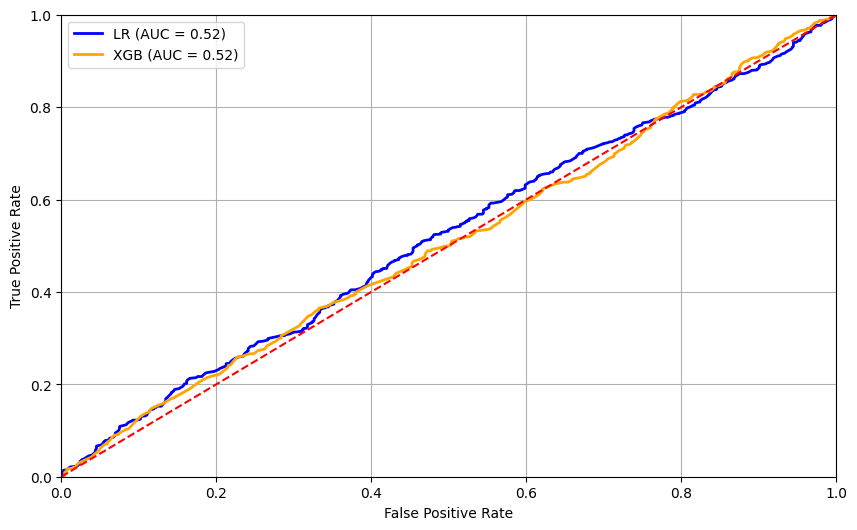

In [403]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_probs_lr = lr.predict_proba(x_test)[:, 1]  
y_probs_xbg = xgb.predict_proba(x_test)[:, 1]

fpr_lr, tpr_lr, thresholds = roc_curve(y_test.map({'적정':1,'비적정':0}), y_probs_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test.map({'적정':1,'비적정':0}), y_probs_xbg)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)


plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'LR (AUC = {roc_auc:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='orange', lw=2, label=f'XGB (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 대각선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

# 통계 (40점)

## 5
어느 회사의 제품 무게는 $N(\theta, 100) $의 정규분포를 따른다고 알려져 있다. 이때, 사전적으로 우리는 제품의 평균 무게 $\theta$가 정규분포 $N(100, 256)$에서 온다고 가정한다.

제품 중 하나의 실제 측정된 무게가 120kg일 때, 이 정보를 바탕으로 사후분포의 평균을 구하시오.

In [406]:
# 주어진 값
sigma_0_squared = 256  # 사전 분산
sigma_squared = 100     # 우도 분산
y = 120                 # 측정된 무게
y_0 = 100               # 사전 평균

# 사후 평균 계산
mu_n = (sigma_0_squared * y + sigma_squared * y_0) / (sigma_0_squared + sigma_squared)

# 결과 출력
print(f"사후분포의 평균: {mu_n:.2f} kg")

사후분포의 평균: 114.38 kg


## 데이터 설명
- 데이터 출처 : https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_5_advertising.csv
- 데이터 설명 : TV, Radio, Newspaper에 각각 광고비(달러)를 다르게 했을때 매출액 (Sales , 밀리언달러)를 나타내는 데이터
- 종속변수 : Sales

## 6-1 회귀 모델링 후 유의하지 않는변수 파악 (15점)

In [409]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_5_advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [420]:
import statsmodels.api as sm

X = df.drop(columns =['Sales'])
y = df['Sales']
X = sm.add_constant(X)


model = sm.OLS(y, X).fit()
model.summary().tables[1]

# Newspaper가 p값이 0.05이상으로 유의하지 않다 볼 수 있다

,coef,std err,t,P>|t|,[0.025,0.975]
const,4.6251,0.308,15.041,0.000,4.019,5.232
TV,0.0544,0.001,39.592,0.000,0.052,0.057
Radio,0.1070,0.008,12.604,0.000,0.090,0.124
Newspaper,0.0003,0.006,0.058,0.954,-0.011,0.012


## 6-2 변수 선택시 먼저 제거 될 변수 및 근거 제시

In [425]:
X.drop(columns =['const']).corr()

,TV,Radio,Newspaper
TV,1.000000,0.054809,0.056648
Radio,0.054809,1.000000,0.354104
Newspaper,0.056648,0.354104,1.000000


변수간 상관성은 낮은 상태이다. 변수 선택시 6-1에서의 결과를 바탕으로 Newspaper를 우선 제거한다

## 6-3 VIF를 통한 다중공선성 진단

In [428]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df.drop(columns =['Sales'])

vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df

# 상수항을 제외한 독립변수로 VIF값을 연산했다. 모두 10이하로 다중공선성은 확인안된다

,Variable,VIF
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245


## 7 (15점)  
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_7.csv

- 데이터 설명 : A,B,C,D,E 영업사원의 각 계약 성사 유무 (1:계약 , 0:미계약) 를 나타낸 데이터이다. 영업사원의 평균 계약 성사 건수는 같은지 통계 검정하라

In [429]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_7.csv',index_col = 0)
df

,A,B,C,D,E
contract_1,1,0,1,1,1
contract_2,0,1,0,1,0
contract_3,1,0,0,0,0
contract_4,0,1,1,1,1
contract_5,0,1,0,1,0
contract_6,1,1,0,1,1
contract_7,0,1,1,0,0
contract_8,0,1,0,0,0
contract_9,1,0,0,1,1
contract_10,1,1,0,0,0


In [433]:
## 프리드먼 검정으로 확인 (세 개 이상의 그룹간에 순위 혹은 이진 데이터에서 비모수적으로 평균 차이 검정)

from scipy.stats import friedmanchisquare

stat, p = friedmanchisquare(df['A'], df['B'], df['C'], df['D'], df['E'])
p # 평균 차이가 유의하지 않다

0.3406392758219488

## 8 유기견이 하루에 2.2마리 발생한다 (10점)

## 8-1 한 마리도 안 버려질 확률

In [439]:
# 포아송 분포

from scipy.stats import poisson

rv =poisson(2.2)
p  = rv.pmf(0)

print(f"한 마리도 안 버려질 확률: {p:.4f}")

한 마리도 안 버려질 확률: 0.1108


## 8-2 적어도 2마리 버려질 확률

In [441]:
rv =poisson(2.2)
p  = 1- rv.pmf(0) -rv.pmf(1) # 한마리도 안버려질 확률과 한마리만 버려질 확률을 더해서 전체 (1)에서 뺀다

print(f"적어도 2마리 버려질 확률: {p:.4f}")

적어도 2마리 버려질 확률: 0.6454
